## 1. Data Preprocessing

## Overview

Practice for Data Analytic Class in Merdeka Belajar 

## Objecive

• Retrieving data 

• Cleansing, integrating
dan transforming data

• Data Preparation

• Exploratory Data
Analysis

• Data Visualization


**About Dataset**

About Dataset
Of all the universities in the world, which are the best?

Ranking universities is a difficult, political, and controversial practice. There are hundreds of different national and international university ranking systems, many of which disagree with each other. This dataset contains three global university rankings from very different places.

University Ranking Data
The Times Higher Education World University Ranking is widely regarded as one of the most influential and widely observed university measures. Founded in the United Kingdom in 2010, it has been criticized for its commercialization and for undermining non-English-instructing institutions.

The Academic Ranking of World Universities, also known as the Shanghai Ranking, is an equally influential ranking. It was founded in China in 2003 and has been criticized for focusing on raw research power and for undermining humanities and quality of instruction.

The Center for World University Rankings, is a less well know listing that comes from Saudi Arabia, it was founded in 2012.

How do these rankings compare to each other?
Are the various criticisms levied against these rankings fair or not?
How does your alma mater fare against the world?
Supplementary Data
To further extend your analyses, we've also included two sets of supplementary data.

The first of these is a set of data on educational attainment around the world. It comes from The World Data Bank and comprises information from the UNESCO Institute for Statistics and the Barro-Lee Dataset. How does national educational attainment relate to the quality of each nation's universities?

The second supplementary dataset contains information about public and private direct expenditure on education across nations. This data comes from the National Center for Education Statistics. It represents expenditure as a percentage of gross domestic product. Does spending more on education lead to better international university rankings?

Dataset description & download https://www.kaggle.com/datasets/mylesoneill/world-university-rankings

**1.1 Importing Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

**1.2 Importing Dataset**

In [3]:
import pandas as pd
dataset = pd.read_csv('/content/shanghaiData.csv')
dataset

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005
1,2,University of Cambridge,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005
2,3,Stanford University,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005
3,4,"University of California, Berkeley",3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005
4,5,Massachusetts Institute of Technology (MIT),4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005
...,...,...,...,...,...,...,...,...,...,...,...
4892,401-500,University of Trieste,11-20,NaN,0.0,0.0,5.0,10.9,25.1,20.1,2015
4893,401-500,University of Zaragoza,9-13,NaN,0.0,0.0,7.6,5.1,33.3,13.1,2015
4894,401-500,Utah State University,126-146,NaN,13.6,0.0,3.6,10.8,25.1,15.5,2015
4895,401-500,Vienna University of Technology,4-6,NaN,0.0,0.0,0.0,12.2,28.8,22.9,2015


## 2. Exploratory Data

provides information about 4897 rows and 11 columns

In [4]:
dataset.shape

(4897, 11)

provied informations about the colomns contain in these dataset

In [5]:
dataset.columns

Index(['world_rank', 'university_name', 'national_rank', 'total_score',
       'alumni', 'award', 'hici', 'ns', 'pub', 'pcp', 'year'],
      dtype='object')

provides information about the data types in these datasets which consist of objects, integers, and floats

In [6]:
dataset.dtypes

world_rank          object
university_name     object
national_rank       object
total_score        float64
alumni             float64
award              float64
hici               float64
ns                 float64
pub                float64
pcp                float64
year                 int64
dtype: object

provides information about the missing values ​​contained in this dataset and there are missing values.

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4897 entries, 0 to 4896
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   world_rank       4897 non-null   object 
 1   university_name  4896 non-null   object 
 2   national_rank    4896 non-null   object 
 3   total_score      1101 non-null   float64
 4   alumni           4896 non-null   float64
 5   award            4895 non-null   float64
 6   hici             4895 non-null   float64
 7   ns               4875 non-null   float64
 8   pub              4895 non-null   float64
 9   pcp              4895 non-null   float64
 10  year             4897 non-null   int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 421.0+ KB


provides information about the category contained in the column

In [60]:
dataset.nunique()

world_rank     98
ns            355
pub           538
pcp           255
dtype: int64

**2.1 Handling Missing Value**

Let's assume unknown value as missing value since unknown means not known or no values

provides information about the missing value and there are several columns that still contain missing value data

In [9]:
dataset.isnull().sum()

world_rank            0
university_name       1
national_rank         1
total_score        3796
alumni                1
award                 2
hici                  2
ns                   22
pub                   2
pcp                   2
year                  0
dtype: int64

Provides information about data types

In [ ]:
dataset['total_score'].dtypes

Provides information about data types

In [12]:
dataset['pcp'].dtypes

dtype('float64')

Provides information about data types

In [13]:
dataset['pub'].dtypes

dtype('float64')

Provides information about data types

In [14]:
dataset['alumni'].dtypes

dtype('float64')

Perform imputer to handle missing value in numerical data

Eliminating the missing value using the mean strategy

In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer

SimpleImputer()

Eliminate the missing values ​​contained in the column

In [16]:
imputer = imputer.fit(dataset[['pub', 'pcp', 'ns']])
imputer

SimpleImputer()

Re-checking the missing values ​​in the dataset and there are no more missing values ​​in the column that was cleaned earlier

In [17]:
dataset[['pub', 'pcp', 'ns']] = imputer.transform(dataset[['pub', 'pcp', 'ns']])
dataset.isnull().sum()

world_rank            0
university_name       1
national_rank         1
total_score        3796
alumni                1
award                 2
hici                  2
ns                    0
pub                   0
pcp                   0
year                  0
dtype: int64

Using drop column tohandle missing value on categorical or object data

In [18]:
dataset = dataset.dropna(axis=1)
dataset.isnull().sum()

world_rank    0
ns            0
pub           0
pcp           0
year          0
dtype: int64

drop datetime column since we don't need it.

In [22]:
dataset = dataset.drop('year', axis=1)
dataset

,world_rank,ns,pub,pcp
0,1,100.0,100.0,72.4
1,2,56.6,70.9,66.9
2,3,70.9,72.3,65.0
3,4,73.9,72.2,52.7
4,5,65.8,64.3,53.0
...,...,...,...,...
4892,401-500,10.9,25.1,20.1
4893,401-500,5.1,33.3,13.1
4894,401-500,10.8,25.1,15.5
4895,401-500,12.2,28.8,22.9


## 3. Data Visualization

**Eploratory Data Analysis (EDA)**

we will not use exploratory data analysis like in the previous class, we'll take another apporach to visualize data

**3.1 Check Outliers**

Outliers are values at the extreme ends of a dataset.

Some outliers represent true values from natural variation in the population. Other outliers may result from incorrect data entry, equipment malfunctions, or other measurement errors.

An outlier isn’t always a form of dirty or incorrect data, so you have to be careful with them in data cleansing. What you should do with an outlier depends on its most likely cause.

for more info: https://www.scribbr.com/statistics/outliers/

Provides information about the mean and min in the dataset

In [23]:
dataset.describe()

,ns,pub,pcp
count,4897.000000,4897.000000,4897.000000
mean,16.078503,38.254648,21.242329
std,12.483388,13.048143,9.252461
min,0.000000,7.300000,8.300000
25%,8.000000,28.900000,15.600000
50%,12.900000,36.000000,19.000000
75%,19.800000,45.300000,24.500000
max,100.000000,100.000000,100.000000


Using math plots to visualize data and there are overlapping data and there are points that are far from the data below and these points are outliers that need to be cleaned.

<Axes: >

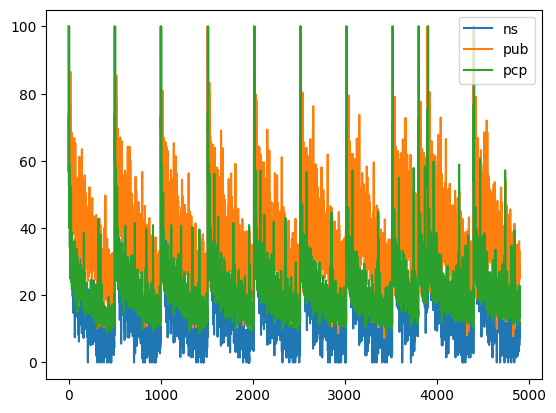

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
dataset.plot()

Using another view, namely boxplot to display outliers data and obtained outliers data, namely ns, pcp, pup

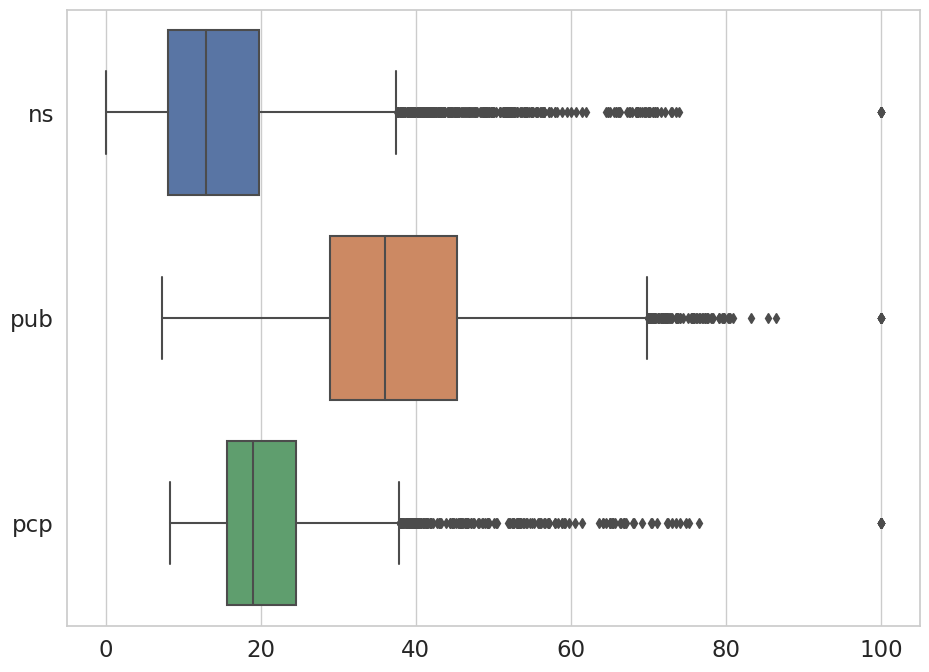

In [25]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

Using another display, namely a scatter plot to display outliers data and obtained outliers data, namely ns, pcp, pup

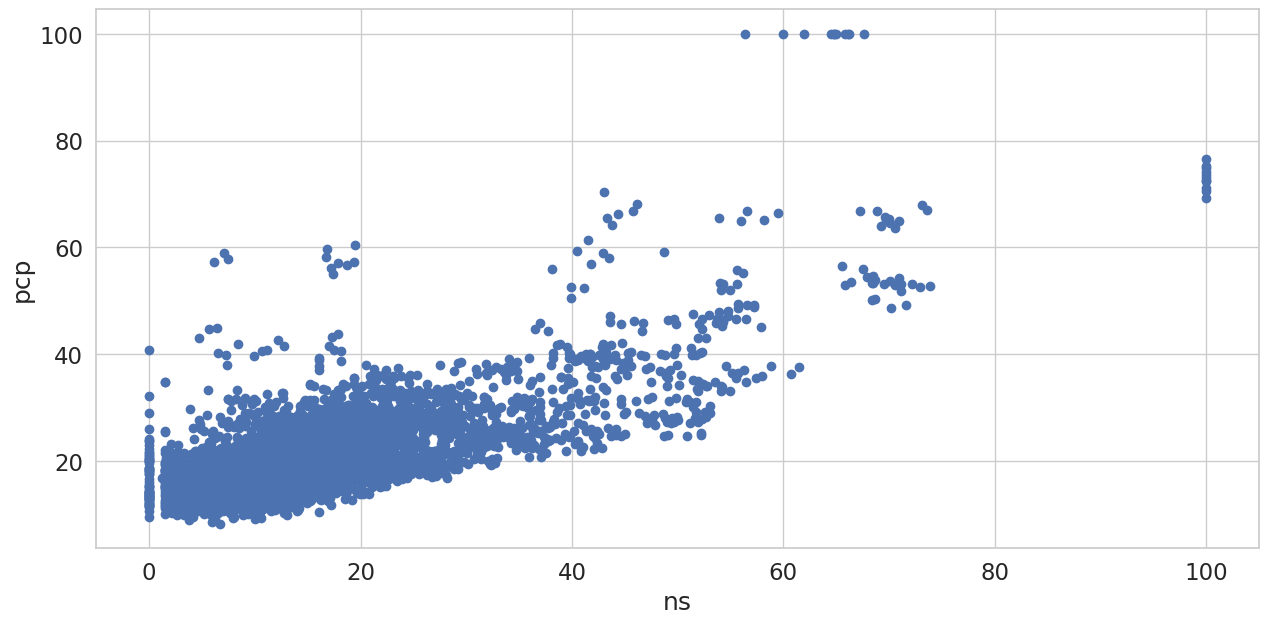

In [26]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['ns'], dataset['pcp'])
 
# x-axis label
ax.set_xlabel('ns')
 
# y-axis label
ax.set_ylabel('pcp')
plt.show()

**Removing the outliers using IQR**

1.   List item
2.   List item



**IQR (Inter Quartile Range)**

IQR = Quartile3 – Quartile1

Quartile description: https://rumusbilangan.com/rumus-kuartil/


IQR is interpolation method to remove outliers

To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

upper = Q3 +1.5*IQR

lower = Q1 – 1.5*IQR

how to calculate IQR:

https://www.timesmojo.com/what-is-the-15-iqr-rule/

https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

In the above formula as according to statistics, the 0.5 scale-up of IQR (new_IQR = IQR + 0.5*IQR) is taken, to consider all the data between 2.7 standard deviations in the Gaussian Distribution.

Removing outliers using the quartile method with Q1 25% and Q3 75%, and displaying the amount of data before cleaning outliers and obtaining 4897 rows and 4 columns

In [27]:
import sklearn

# IQR Price
Q1 = np.percentile(dataset['ns'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['ns'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (4897, 4)


displays the amount of data after cleaning outliers and 4571 rows and 4 columns are obtained

In [29]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['ns'] > upper].index
outliers_lower = dataset[dataset['ns'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (4571, 4)


displays the amount of data before cleaning outliers and 4571 rows and 4 columns are obtained

In [30]:
import sklearn

# IQR Landsize
Q1 = np.percentile(dataset['pcp'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['pcp'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (4571, 4)


displays the amount of data after cleaning the outliers and 4481 rows and 4 columns are obtained

In [31]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['pcp'] > upper].index
outliers_lower = dataset[dataset['pcp'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (4481, 4)


displays data using a boxplot to check again whether the data has been cleaned of outliers and it is found that the data that was cleaned earlier has no outliers anymore


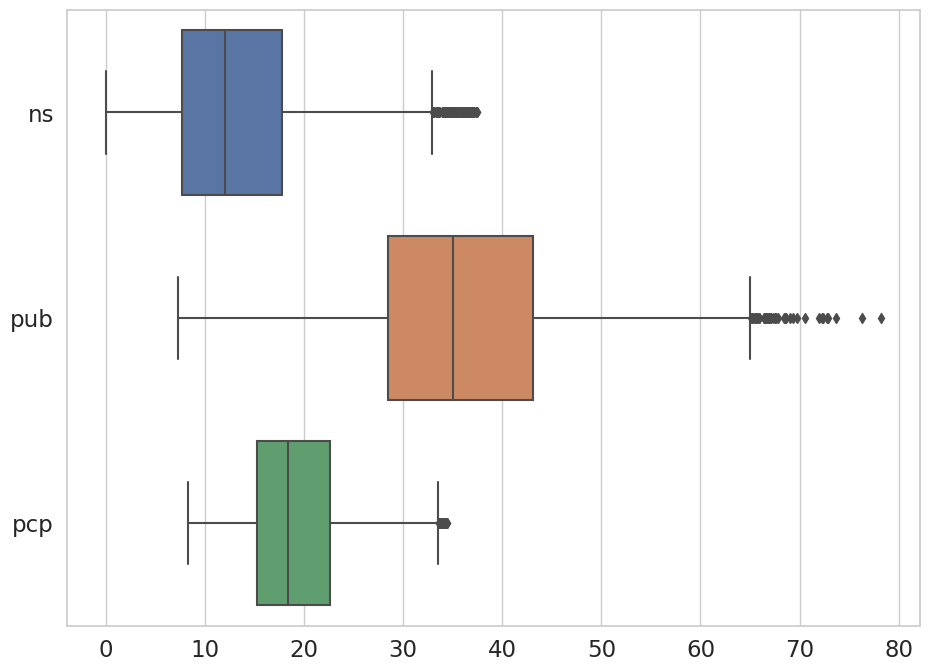

In [32]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

displays data using a Scatter plot to check again whether the data has been cleaned of outliers and it is found that the data that was cleaned earlier has no outliers anymore

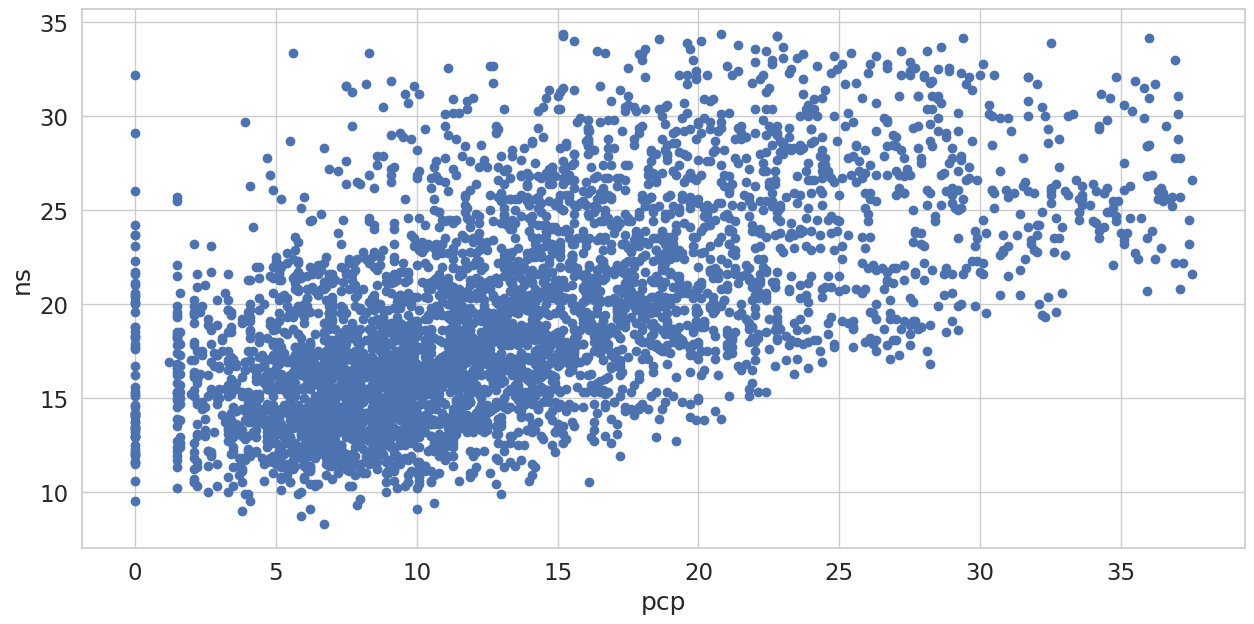

In [33]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['ns'], dataset['pcp'])
 
# x-axis label
ax.set_xlabel('pcp')
 
# y-axis label
ax.set_ylabel('ns')
plt.show()

Show data distribution based on density (kde - kernel density estimation)

Displaying data to check data density and obtained dominant data density collects in the middle

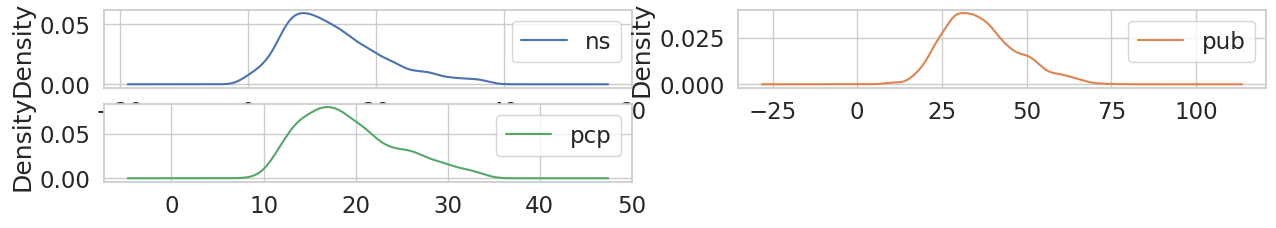

In [34]:
dataset.plot(kind='kde',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

Show data distribution based on histogram

using a bar chart to visualize the data and get varied data in the column pub and ns

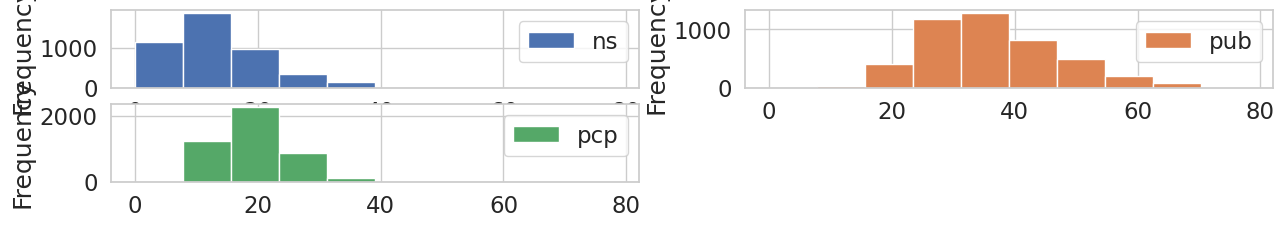

In [35]:
dataset.plot(kind='hist',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

use the line to visualize the data and get the data in the form of a signal

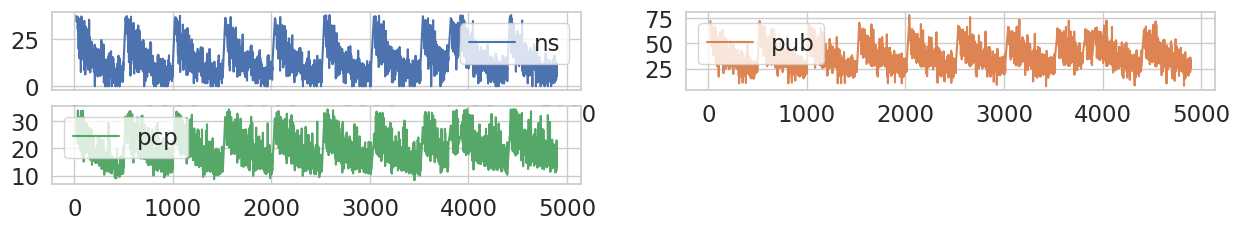

In [36]:
dataset.plot(kind='line',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

**3.2 CORRELATION MATRIX**

Using a math plot to check the correlation matrix and on the diagonal line there is a bar chart which shows that it has a high matrix correlation because it is related to the column itself

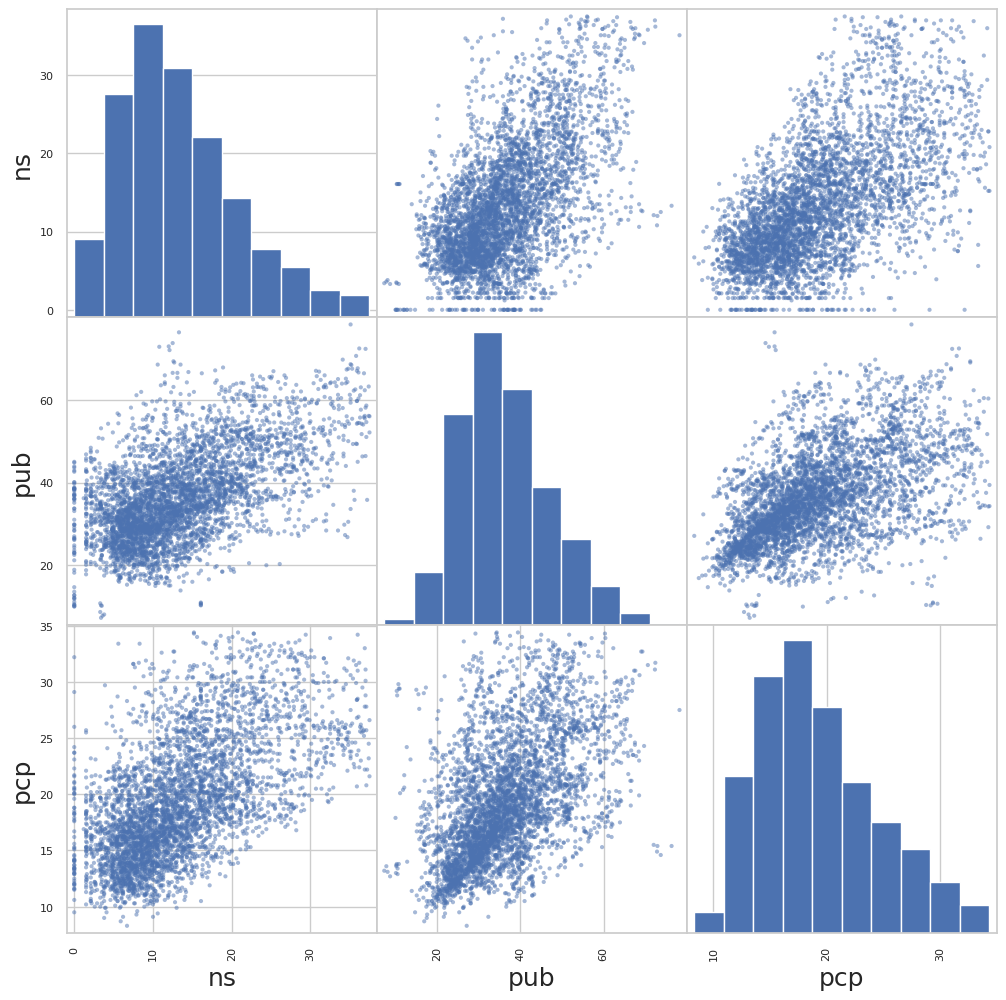

In [37]:
pd.plotting.scatter_matrix(dataset,figsize=(12,12))
plt.show()

correlation matrix with heatmap

use a heat map to check the correlation matrix and get a green diagonal line and a value of 1 which indicates that it has a high correlation matrix and the red one has a value of 0.51 indicating a bad correlation

<ipython-input-38-4b443a21f68f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_data.corr()


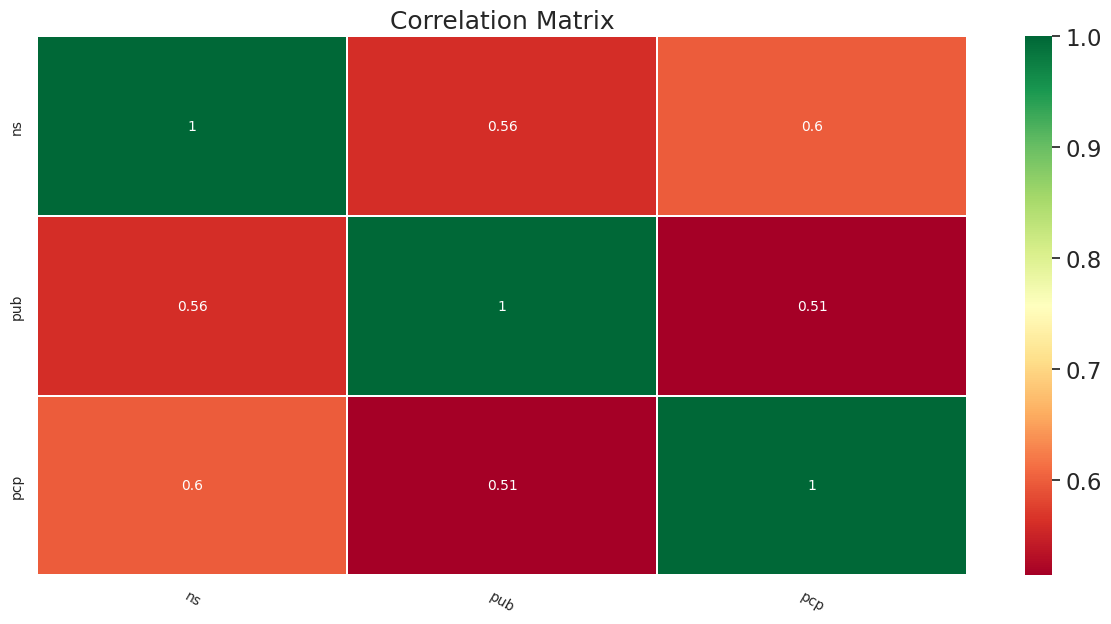

In [38]:
corr_data = dataset
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

**4. Splitting Dataset**

**4.1 Slicing**

We define x and y as x for data and y for label

use the ns column as a label

In [42]:
x = dataset.drop('ns', axis=1)
x

,world_rank,pub,pcp
21,22,72.3,31.1
24,25,58.0,26.0
28,29,55.4,26.3
32,32,68.4,23.8
34,35,46.3,29.5
...,...,...,...
4892,401-500,25.1,20.1
4893,401-500,33.3,13.1
4894,401-500,25.1,15.5
4895,401-500,28.8,22.9


Choose feature Type as a label

In [44]:
y = dataset["ns"]
y

21      37.0
24      34.1
28      35.3
32      35.2
34      36.6
        ... 
4892    10.9
4893     5.1
4894    10.8
4895    12.2
4896     7.5
Name: ns, Length: 4481, dtype: float64

In [45]:
y.values.reshape(-1,1)

array([[37. ],
       [34.1],
       [35.3],
       ...,
       [10.8],
       [12.2],
       [ 7.5]])

**4.2 Categorical Encoding**

Choose One Hot Encoding or Label Encoding for perform categorical encoding

**One-Hot Encoding for data input x**

using on hot encoding to display numeric data with the condition that if 1 then there is data, and if 0 then there is no data

In [47]:
x = pd.get_dummies(x)
x

,pub,pcp,world_rank_100,world_rank_101-150,world_rank_101-151,world_rank_101-152,world_rank_102-150,world_rank_151-200,world_rank_151-202,world_rank_152-200,...,world_rank_90,world_rank_91,world_rank_92,world_rank_93,world_rank_94,world_rank_95,world_rank_96,world_rank_97,world_rank_98,world_rank_99
21,72.3,31.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,58.0,26.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,55.4,26.3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,68.4,23.8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,46.3,29.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4892,25.1,20.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4893,33.3,13.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4894,25.1,15.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4895,28.8,22.9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
x.shape

(4481, 100)

**4.2.1 Standarization**

Standardization is used on the data values that are normally distributed. Further, by applying standardization, we tend to make the mean of the dataset as 0 and the standard deviation equivalent to 1.

That is, by standardizing the values, we get the following statistics of the data distribution

mean = 0
standard deviation = 1

Thus, by this the data set becomes self explanatory and easy to analyze as the mean turns down to 0 and it happens to have an unit variance.

References: https://www.askpython.com/python/examples/standardize-data-in-python#:~:text=Ways%20to%20Standardize%20Data%20in%20Python%201%201.,load_iris%20...%202%202.%20Using%20StandardScaler%20%28%29%20function

displays data using the standard deviation

In [49]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit_transform(x)
std_scale = pd.DataFrame(std_scale)

std_scale

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.294558,2.224219,-0.042291,-0.215577,-0.151082,-0.108355,-0.182869,-0.267868,-0.108355,-0.14953,...,-0.061711,-0.036617,-0.051819,-0.061711,-0.044861,-0.029891,-0.049607,-0.059862,-0.033423,-0.053941
1,1.981056,1.261909,-0.042291,-0.215577,-0.151082,-0.108355,-0.182869,-0.267868,-0.108355,-0.14953,...,-0.061711,-0.036617,-0.051819,-0.061711,-0.044861,-0.029891,-0.049607,-0.059862,-0.033423,-0.053941
2,1.742237,1.318515,-0.042291,-0.215577,-0.151082,-0.108355,-0.182869,-0.267868,-0.108355,-0.14953,...,-0.061711,-0.036617,-0.051819,-0.061711,-0.044861,-0.029891,-0.049607,-0.059862,-0.033423,-0.053941
3,2.936330,0.846795,-0.042291,-0.215577,-0.151082,-0.108355,-0.182869,-0.267868,-0.108355,-0.14953,...,-0.061711,-0.036617,-0.051819,-0.061711,-0.044861,-0.029891,-0.049607,-0.059862,-0.033423,-0.053941
4,0.906371,1.922318,-0.042291,-0.215577,-0.151082,-0.108355,-0.182869,-0.267868,-0.108355,-0.14953,...,-0.061711,-0.036617,-0.051819,-0.061711,-0.044861,-0.029891,-0.049607,-0.059862,-0.033423,-0.053941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476,-1.040919,0.148648,-0.042291,-0.215577,-0.151082,-0.108355,-0.182869,-0.267868,-0.108355,-0.14953,...,-0.061711,-0.036617,-0.051819,-0.061711,-0.044861,-0.029891,-0.049607,-0.059862,-0.033423,-0.053941
4477,-0.287722,-1.172170,-0.042291,-0.215577,-0.151082,-0.108355,-0.182869,-0.267868,-0.108355,-0.14953,...,-0.061711,-0.036617,-0.051819,-0.061711,-0.044861,-0.029891,-0.049607,-0.059862,-0.033423,-0.053941
4478,-1.040919,-0.719318,-0.042291,-0.215577,-0.151082,-0.108355,-0.182869,-0.267868,-0.108355,-0.14953,...,-0.061711,-0.036617,-0.051819,-0.061711,-0.044861,-0.029891,-0.049607,-0.059862,-0.033423,-0.053941
4479,-0.701062,0.676975,-0.042291,-0.215577,-0.151082,-0.108355,-0.182869,-0.267868,-0.108355,-0.14953,...,-0.061711,-0.036617,-0.051819,-0.061711,-0.044861,-0.029891,-0.049607,-0.059862,-0.033423,-0.053941


**4.2.2 Normalization**

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

reference : https://stackoverflow.com/questions/62178888/can-someone-explain-to-me-how-minmaxscaler-works


In [50]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)
x = pd.DataFrame(x)

x

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.916784,0.873563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.715092,0.678161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.678420,0.689655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.861777,0.593870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.550071,0.812261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476,0.251058,0.452107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4477,0.366714,0.183908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4478,0.251058,0.275862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4479,0.303244,0.559387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**4.3 Splitting**

In [52]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
x,y = make_blobs(n_samples=1000)
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.33, random_state=1, stratify=y)


In [53]:
from collections import Counter
print("Train distribution", Counter(yTrain))
print("Test distribution", Counter(yTest))

Train distribution Counter({0: 224, 1: 223, 2: 223})
Test distribution Counter({0: 110, 1: 110, 2: 110})


This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

For more: https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn

Tugas praktekkan dengan dataset yg berbeda dari kaggle dan upload di github


In [54]:
from sklearn.linear_model import LogisticRegression

models = []
models.append(('LR', LogisticRegression()))

In [55]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10)    
    # train the model
    cv_results = cross_val_score(model, xTrain, yTrain, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 1.000000 (0.000000)


In [56]:
LR = LogisticRegression()
LR.fit(xTrain, yTrain)

LogisticRegression()

In [57]:
predictions = LR.predict(xTest)
print(accuracy_score(yTest, predictions))

1.0


[[110   0   0]
 [  0 110   0]
 [  0   0 110]]


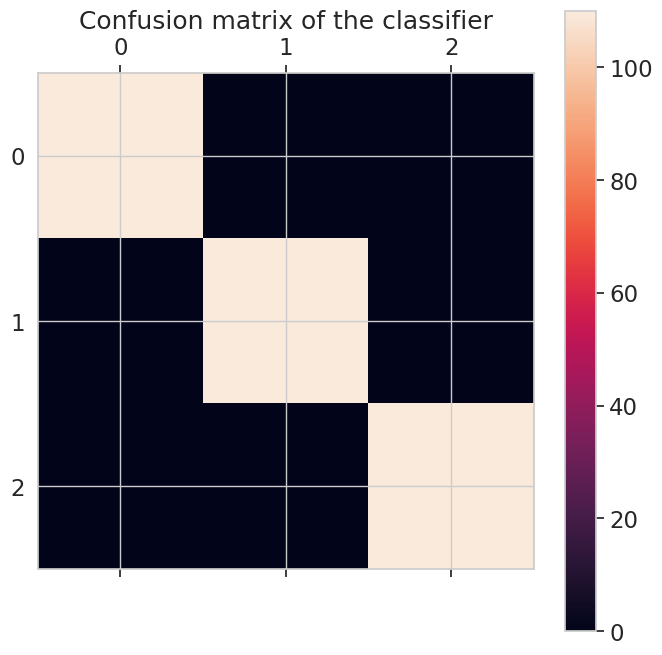

In [58]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(yTest, predictions))

cm = confusion_matrix(yTest, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [59]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(yTest, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       110
           2       1.00      1.00      1.00       110

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330

